<a href="https://colab.research.google.com/github/rusiruerandaka/Product_Review_Analyzer_NLP/blob/main/review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Validation Classification Report:
               precision    recall  f1-score   support

    Negative       0.32      0.28      0.30        50
     Neutral       0.26      0.24      0.25        55
    Positive       0.29      0.36      0.32        45

    accuracy                           0.29       150
   macro avg       0.29      0.29      0.29       150
weighted avg       0.29      0.29      0.29       150

Final Validation Accuracy: 0.2866666666666667
Model and vectorizer saved successfully.


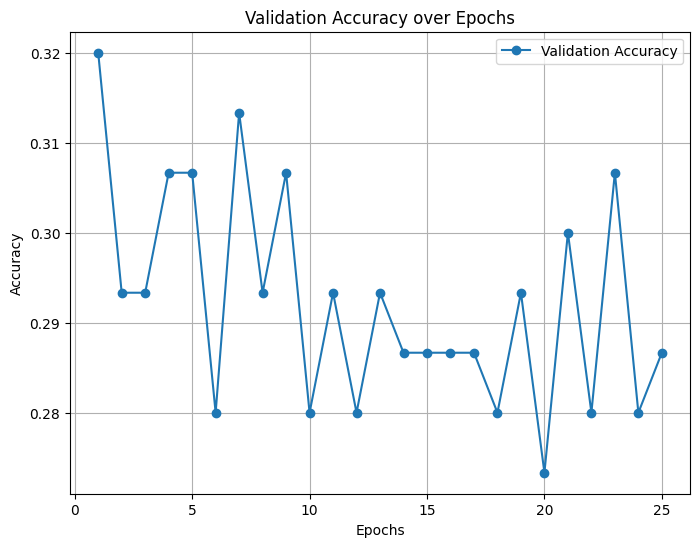

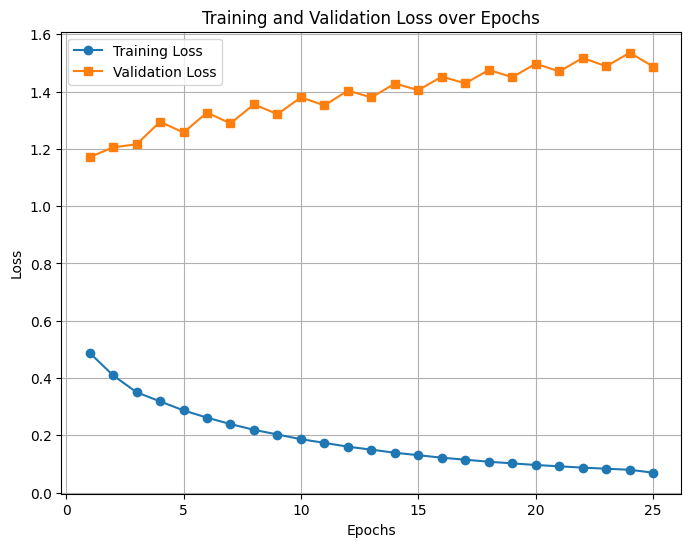

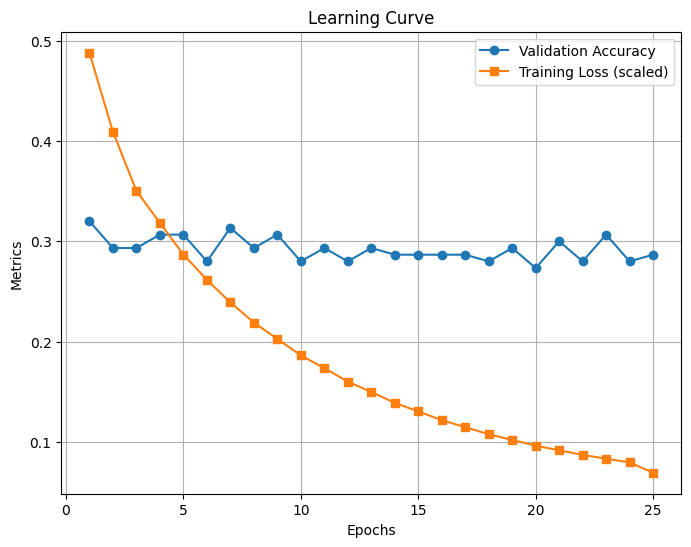

Review Sentiment: Neutral


In [1]:
import pandas as pd
import pickle
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, log_loss
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load training dataset
train_file_path = '/content/drive/My Drive/reviews.csv'
data = pd.read_csv(train_file_path)

# Load validation dataset
validation_file_path = '/content/drive/My Drive/validation.csv'
validation_data = pd.read_csv(validation_file_path)

# Prepare training data
X_train = data['Comment']
y_train = data['Label']

# Prepare validation data
X_val = validation_data['Comment']
y_val = validation_data['Label']

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train a Logistic Regression model with epochs-like iterations
model = LogisticRegression(max_iter=1, warm_start=True)
train_losses = []
val_losses = []
val_accuracies = []
epochs = 25

for epoch in range(epochs):
    model.fit(X_train_tfidf, y_train)

    # Calculate training loss
    train_prob = model.predict_proba(X_train_tfidf)
    train_loss = log_loss(y_train, train_prob)
    train_losses.append(train_loss)

    # Calculate validation loss and accuracy
    val_prob = model.predict_proba(X_val_tfidf)
    val_loss = log_loss(y_val, val_prob)
    val_losses.append(val_loss)

    y_val_pred = model.predict(X_val_tfidf)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

# Final evaluation on validation data
y_val_pred = model.predict(X_val_tfidf)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Final Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Save the model and vectorizer using pickle
model_path = '/content/drive/My Drive/logistic_model.pkl'
vectorizer_path = '/content/drive/My Drive/vectorizer.pkl'

with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

with open(vectorizer_path, 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model and vectorizer saved successfully.")

# Function to predict sentiment of a custom review
def predict_sentiment(review):
    # Load the model and vectorizer from disk
    with open(model_path, 'rb') as model_file:
        loaded_model = pickle.load(model_file)

    with open(vectorizer_path, 'rb') as vectorizer_file:
        loaded_vectorizer = pickle.load(vectorizer_file)

    # Transform the input review using the vectorizer
    review_tfidf = loaded_vectorizer.transform([review])
    prediction = loaded_model.predict(review_tfidf)
    return prediction[0]

# Plot validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation losses over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, marker='s', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Learning curve combining both metrics
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
plt.plot(range(1, epochs + 1), train_losses, marker='s', label='Training Loss (scaled)')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Test the function with a custom review
custom_review = "bad"
print("Review Sentiment:", predict_sentiment(custom_review))

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load model and vectorizer
with open("/content/drive/My Drive/logistic_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

with open("/content/drive/My Drive/vectorizer.pkl", "rb") as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Example review
review = "The product is excellent and works perfectly!"

# Transform the review using the vectorizer
review_tfidf = vectorizer.transform([review])

# Get the probabilities for each class
prediction_proba = model.predict_proba(review_tfidf)

# Get the index of the highest probability (i.e., the predicted class)
predicted_class = prediction_proba.argmax(axis=1)[0]

# Print the predicted class and its probability
print(f"Predicted class: {predicted_class}")
print(f"Prediction probabilities: {prediction_proba[0]}")


Predicted class: 2
Prediction probabilities: [0.05167267 0.04777828 0.90054905]
